<a href="https://colab.research.google.com/github/hardik1408/MADHAV-LABS/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [2]:
%mkdir music
%cd music

/content/music


In [3]:
!kaggle datasets download -d kcwaghmarewaghmare/indian-music-raga


100% 954M/955M [00:36<00:00, 27.7MB/s]
100% 955M/955M [00:36<00:00, 27.5MB/s]


In [4]:
!unzip -q indian-music-raga.zip


In [5]:
!pip install librosa


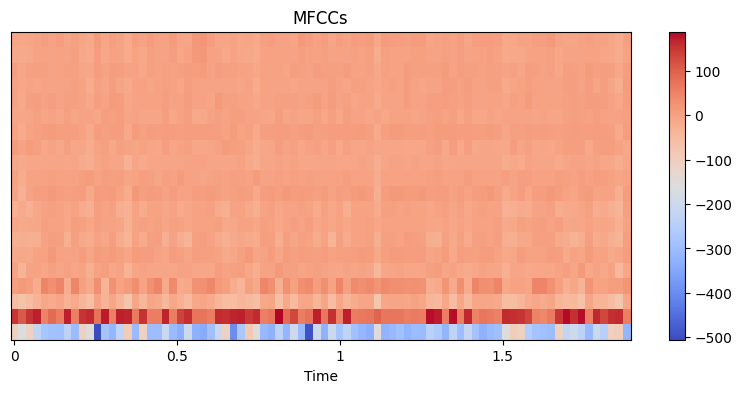

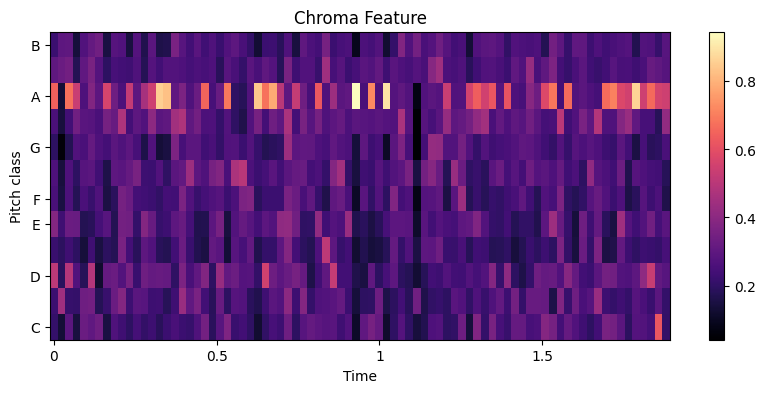

In [6]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import numpy as np

# Function to extract and visualize audio features
def visualize_audio_features(audio_folder, file_type):
    # Lists to store aggregated features
    all_mfccs = []
    all_chromas = []

    # Iterate through audio files
    for filename in os.listdir(audio_folder):
        if filename.endswith(file_type):
            file_path = os.path.join(audio_folder, filename)

            # Load audio file
            y, sr = librosa.load(file_path)

            # Extract features
            mfccs = librosa.feature.mfcc(y=y, sr=sr)
            chroma = librosa.feature.chroma_stft(y=y, sr=sr)

            # Aggregate features
            all_mfccs.append(mfccs.mean(axis=1))  # Taking mean across time
            all_chromas.append(chroma.mean(axis=1))

    # Convert lists to NumPy arrays
    all_mfccs = np.array(all_mfccs)
    all_chromas = np.array(all_chromas)

    # Visualize MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(all_mfccs.T, x_axis='time')
    plt.colorbar()
    plt.title('MFCCs')
    plt.show()

    # Visualize Chroma feature
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(all_chromas.T, x_axis='time', y_axis='chroma')
    plt.colorbar()
    plt.title('Chroma Feature')
    plt.show()

# Example usage
audio_folder = '/content/music'
file_type = '.wav'  # Adjust based on your audio file format
visualize_audio_features(audio_folder, file_type)


In [7]:
audio1= "/content/music/Bhairavi01.wav"
audio2= "/content/music/DKanada01.wav"
audio3= "/content/music/asavari01.wav"
audio4= "/content/music/bageshree01.wav"
audio5= "/content/music/bhoopali01.wav"
audio6= "/content/music/darbari01.wav"

In [8]:
import librosa.display
import IPython.display as ipd
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [9]:
data1,sr1=librosa.load(audio1)
data2,sr2=librosa.load(audio2)
data3,sr3=librosa.load(audio3)
# ipd.Audio(audio1)

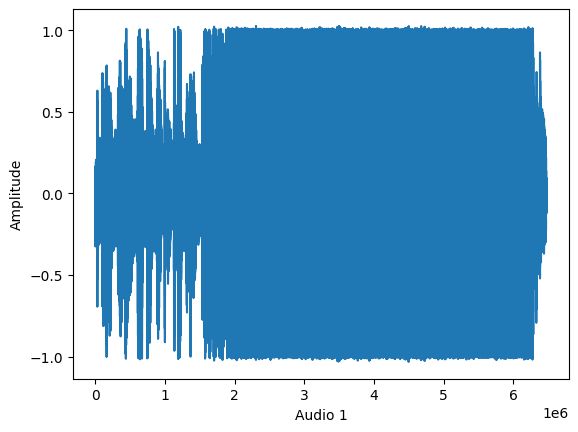

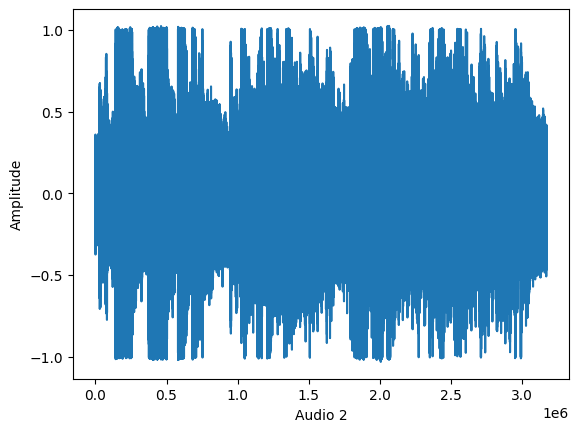

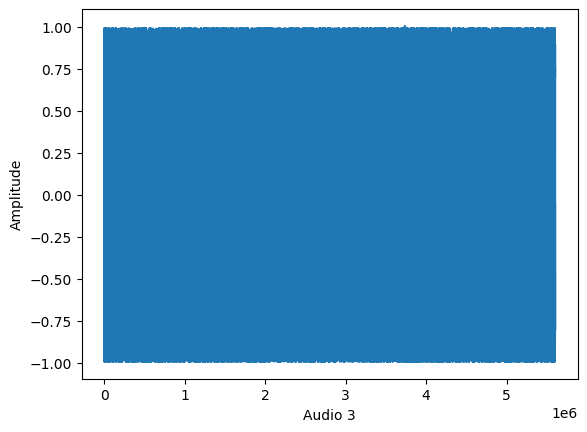

In [10]:
plt.plot(data1)
plt.xlabel('Audio 1')
plt.ylabel('Amplitude')
plt.show()
plt.plot(data2)
plt.xlabel('Audio 2')
plt.ylabel('Amplitude')
plt.show()
plt.plot(data3)
plt.xlabel('Audio 3')
plt.ylabel('Amplitude')
plt.show()

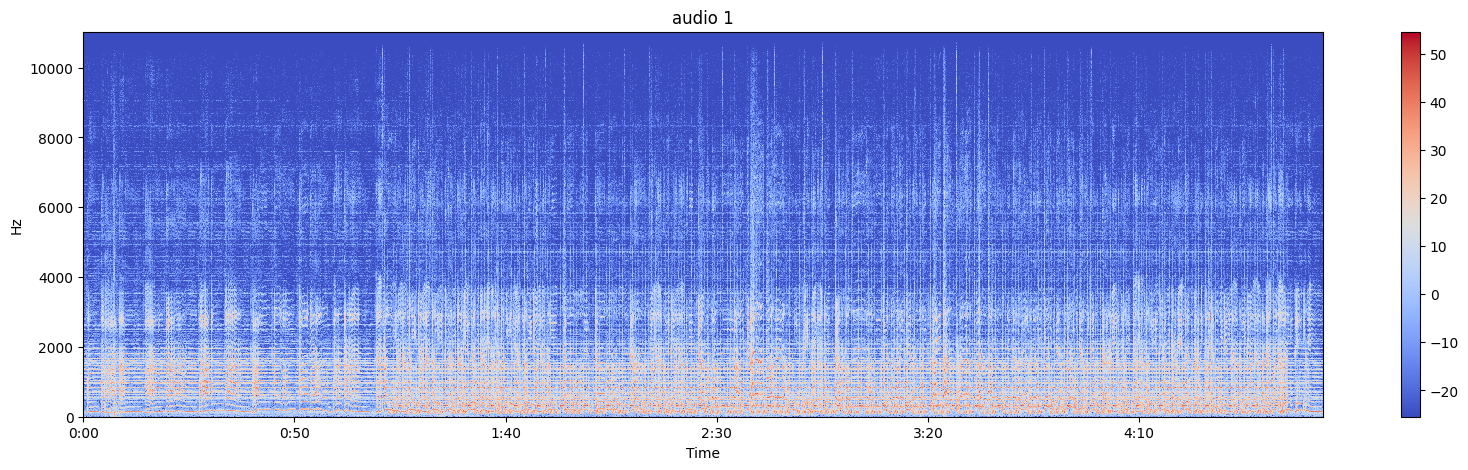

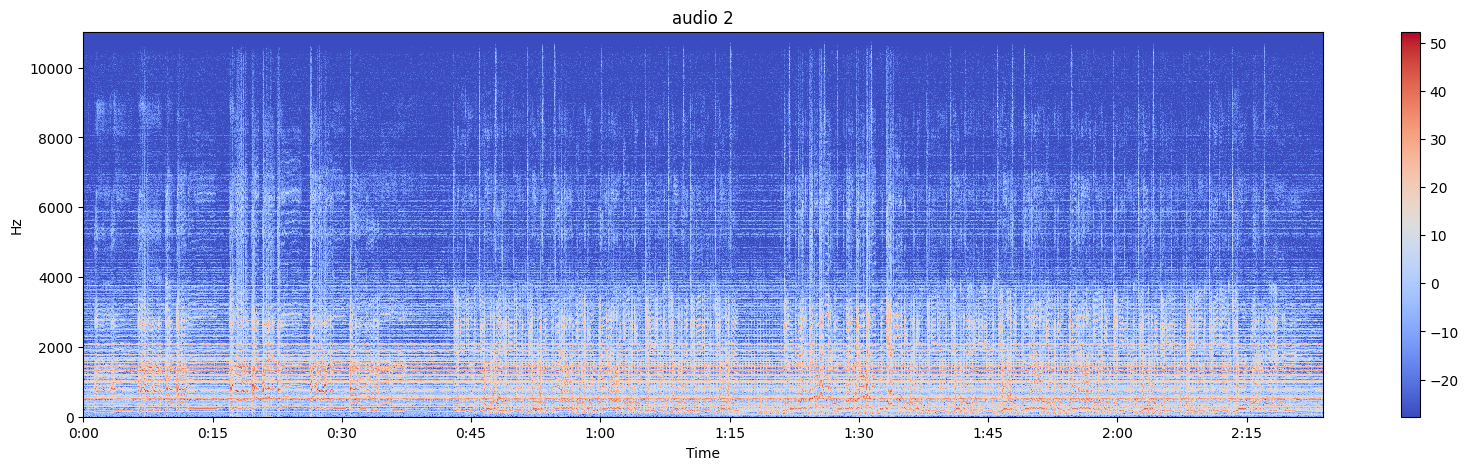

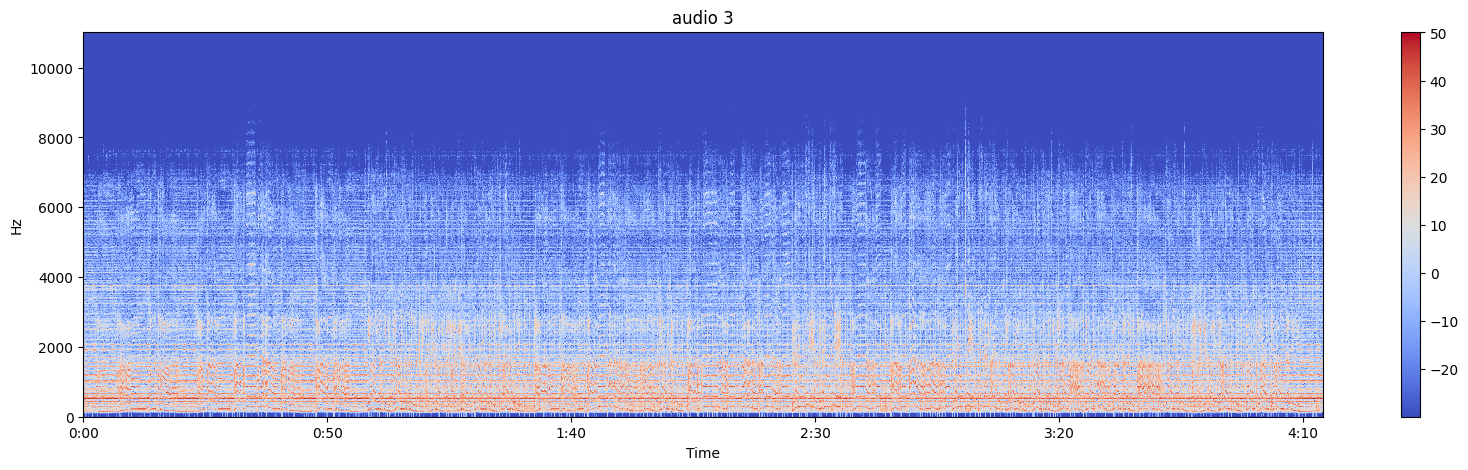

In [11]:
X = librosa.stft(data1)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
plt.title("audio 1")
librosa.display.specshow(Xdb, sr=sr1, x_axis='time', y_axis='hz')
plt.colorbar()
X = librosa.stft(data2)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
plt.title("audio 2")
librosa.display.specshow(Xdb, sr=sr1, x_axis='time', y_axis='hz')
plt.colorbar()
X = librosa.stft(data3)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
plt.title("audio 3")
librosa.display.specshow(Xdb, sr=sr1, x_axis='time', y_axis='hz')
plt.colorbar()

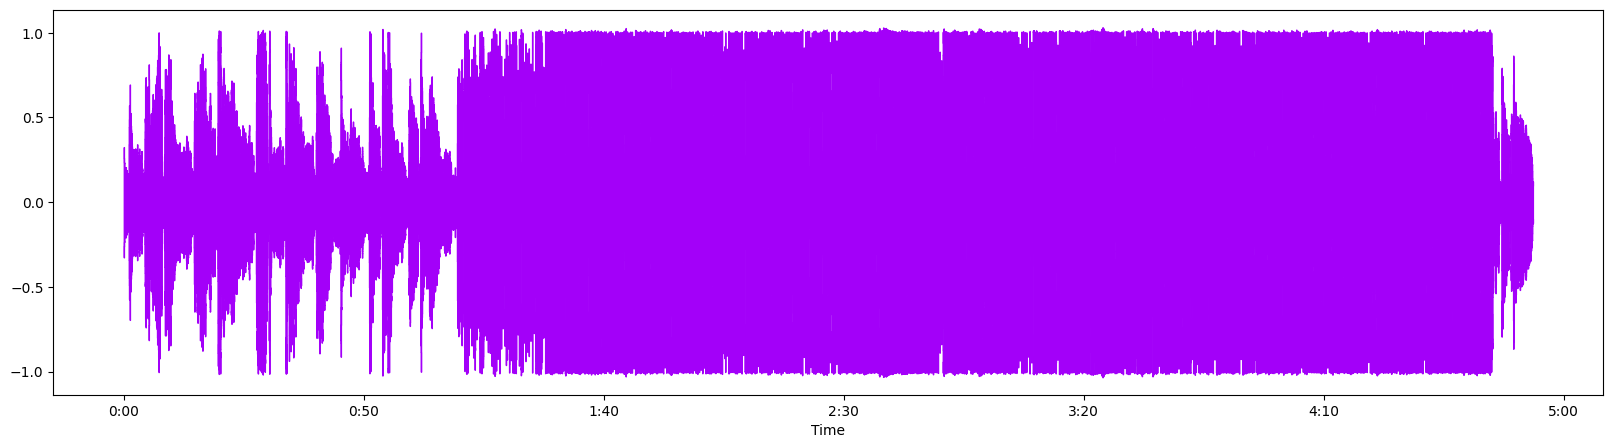

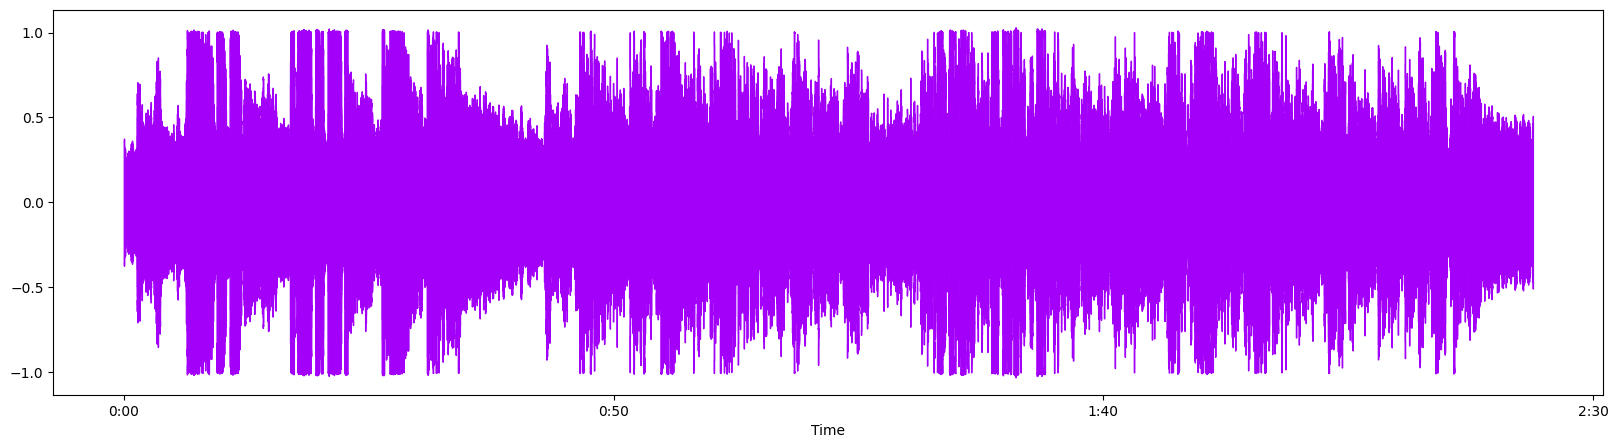

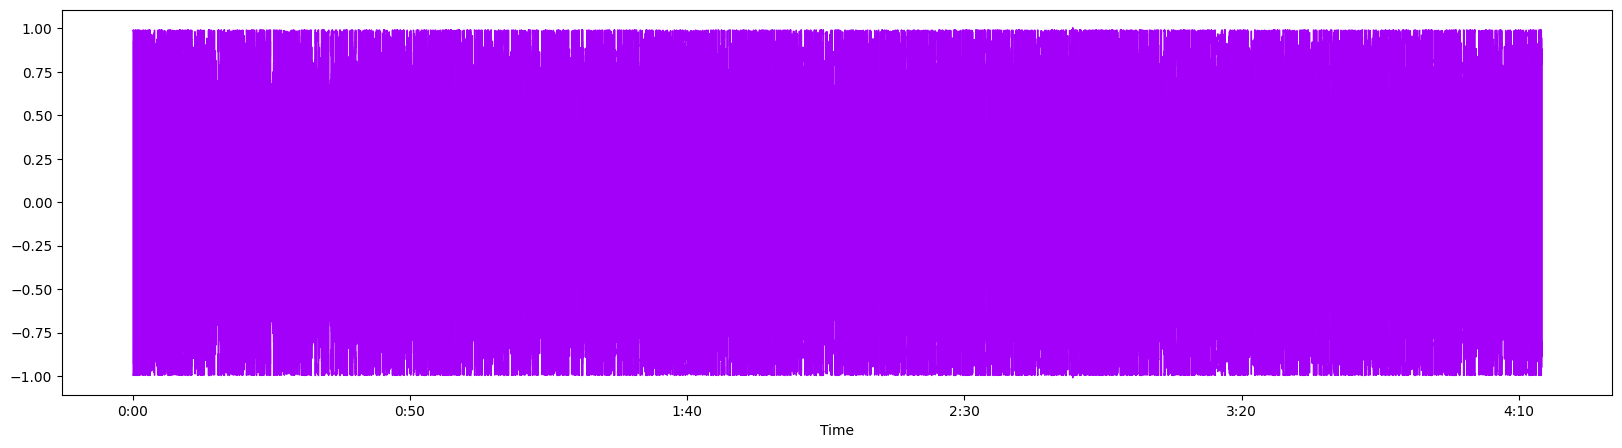

In [12]:
#Plot the signal:
plt.figure(figsize=(20, 5))
librosa.display.waveshow(data1, sr=sr1,color = "#A300F9")
plt.figure(figsize=(20, 5))
librosa.display.waveshow(data2, sr=sr2,color = "#A300F9")
plt.figure(figsize=(20, 5))
librosa.display.waveshow(data3, sr=sr3,color = "#A300F9")

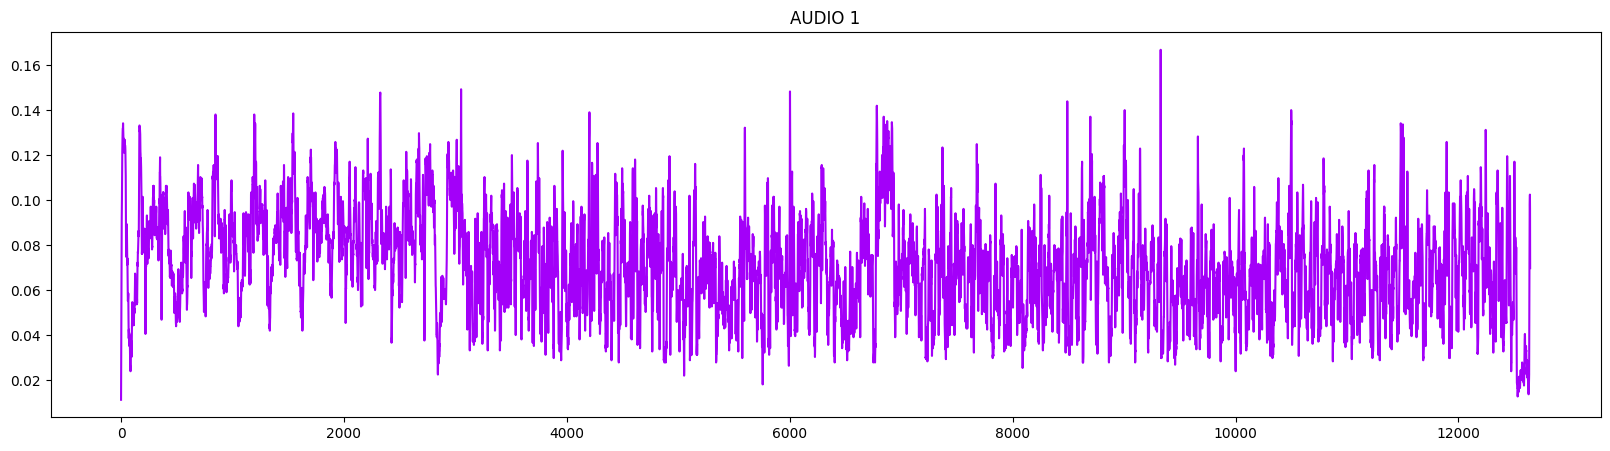

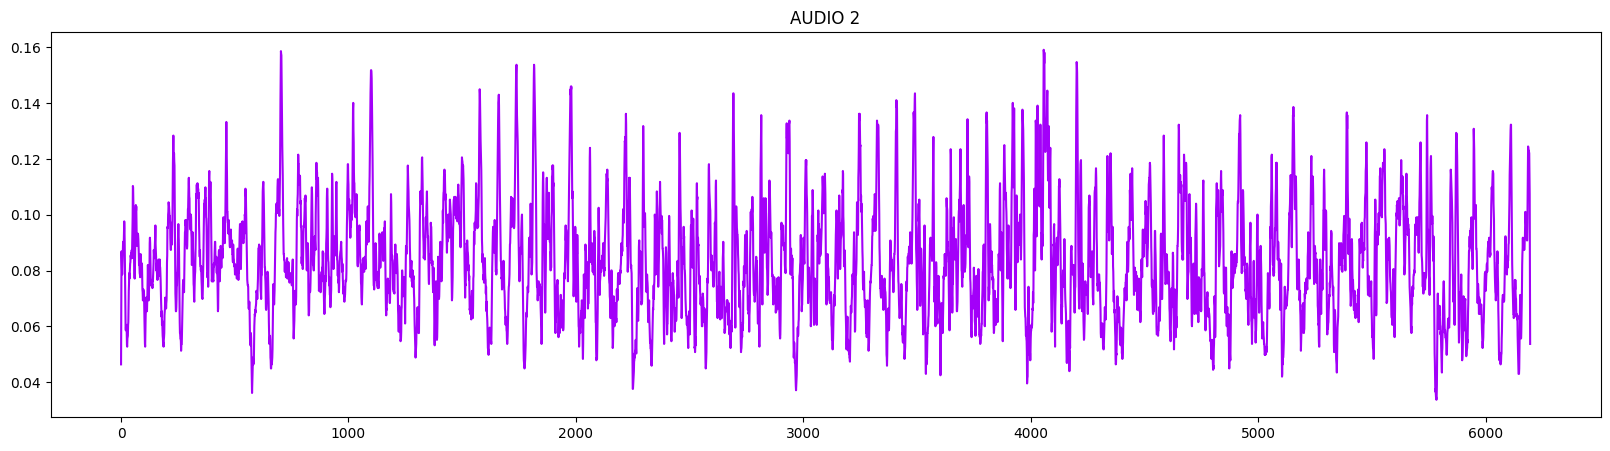

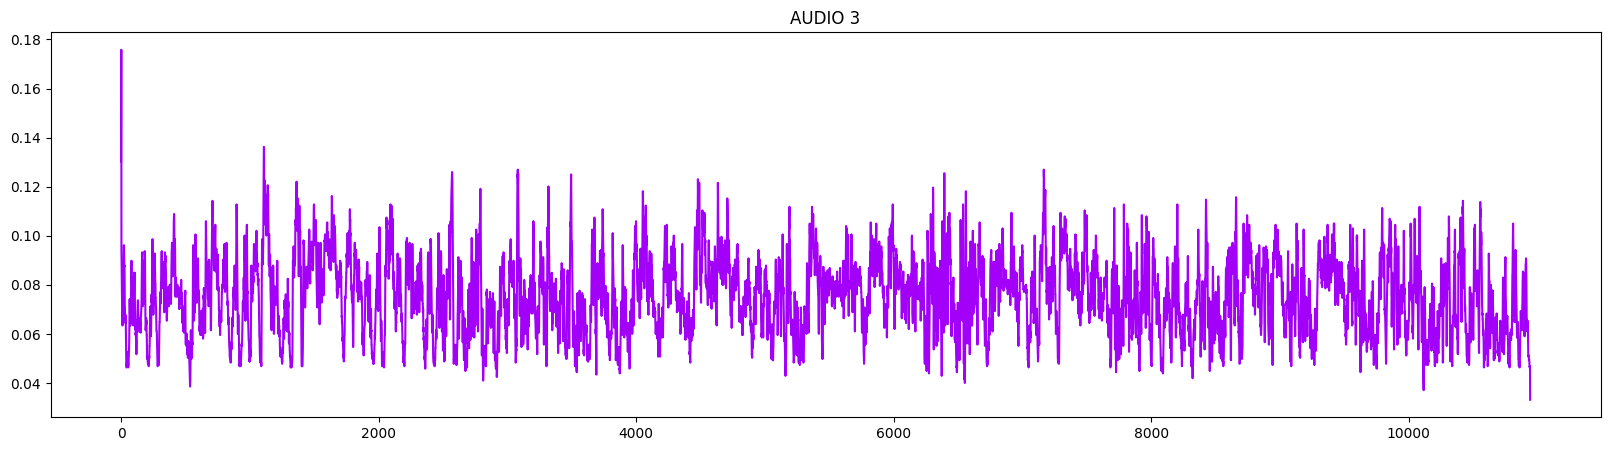

In [13]:
zero_crossing_rate = librosa.feature.zero_crossing_rate(y = data1,hop_length = 512)[0]
plt.figure(figsize=(20, 5))
plt.title("AUDIO 1")
plt.plot(zero_crossing_rate,color = "#A300F9")

zero_crossing_rate = librosa.feature.zero_crossing_rate(y = data2,hop_length = 512)[0]
plt.figure(figsize=(20, 5))
plt.title("AUDIO 2")
plt.plot(zero_crossing_rate,color = "#A300F9")

zero_crossing_rate = librosa.feature.zero_crossing_rate(y = data3,hop_length = 512)[0]
plt.figure(figsize=(20, 5))
plt.title("AUDIO 3")
plt.plot(zero_crossing_rate,color = "#A300F9")

 ...]

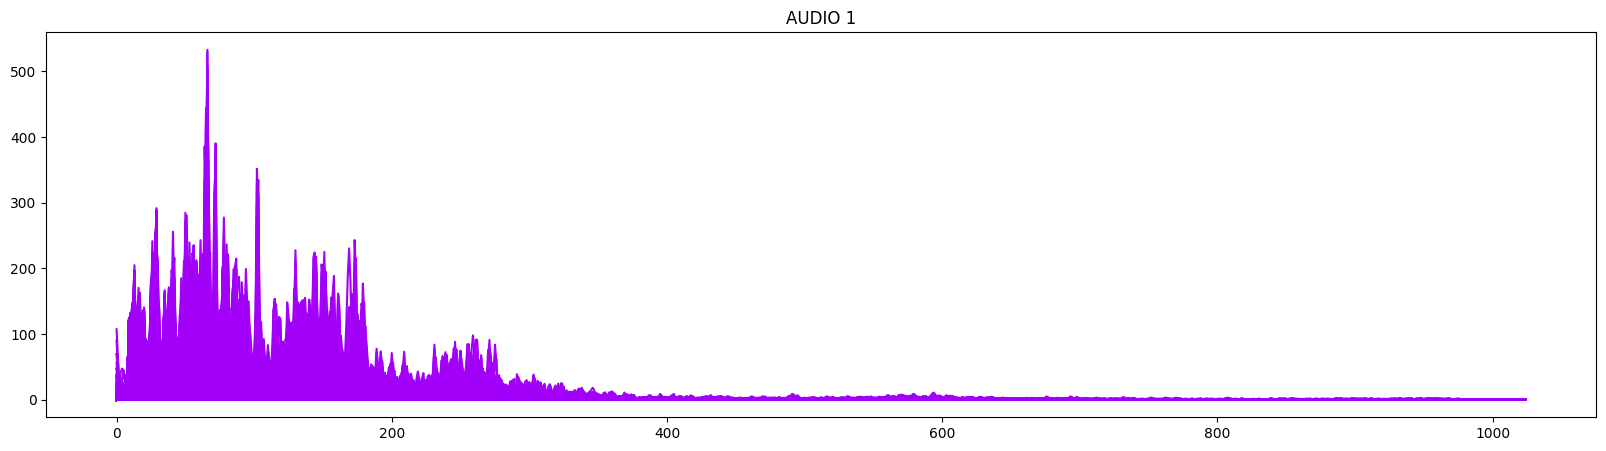

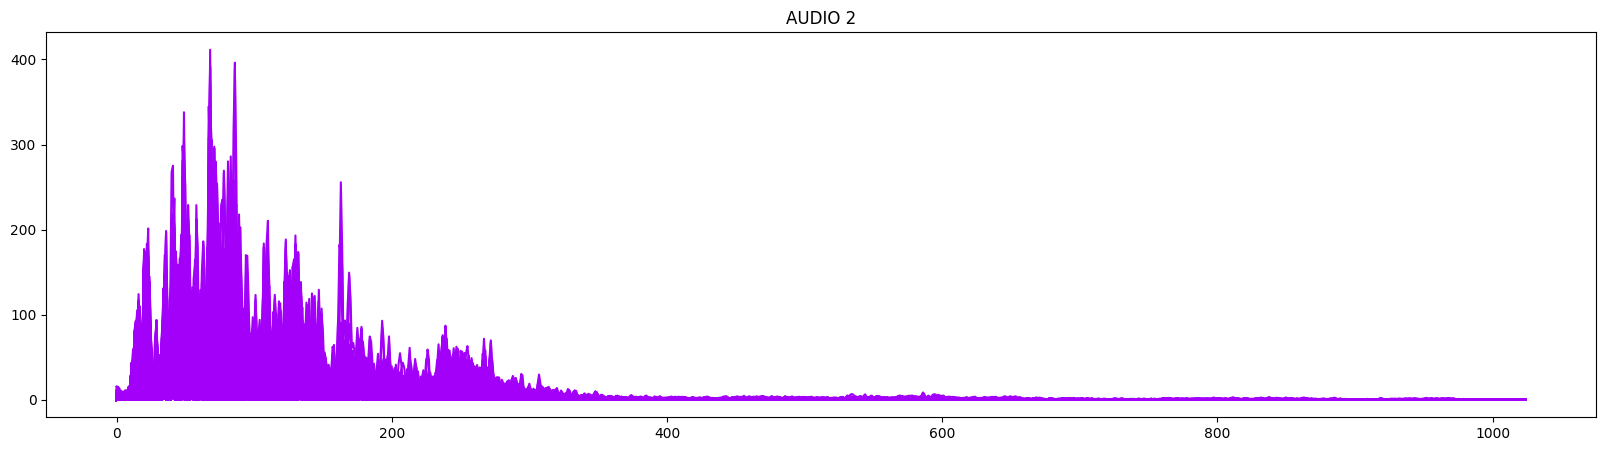

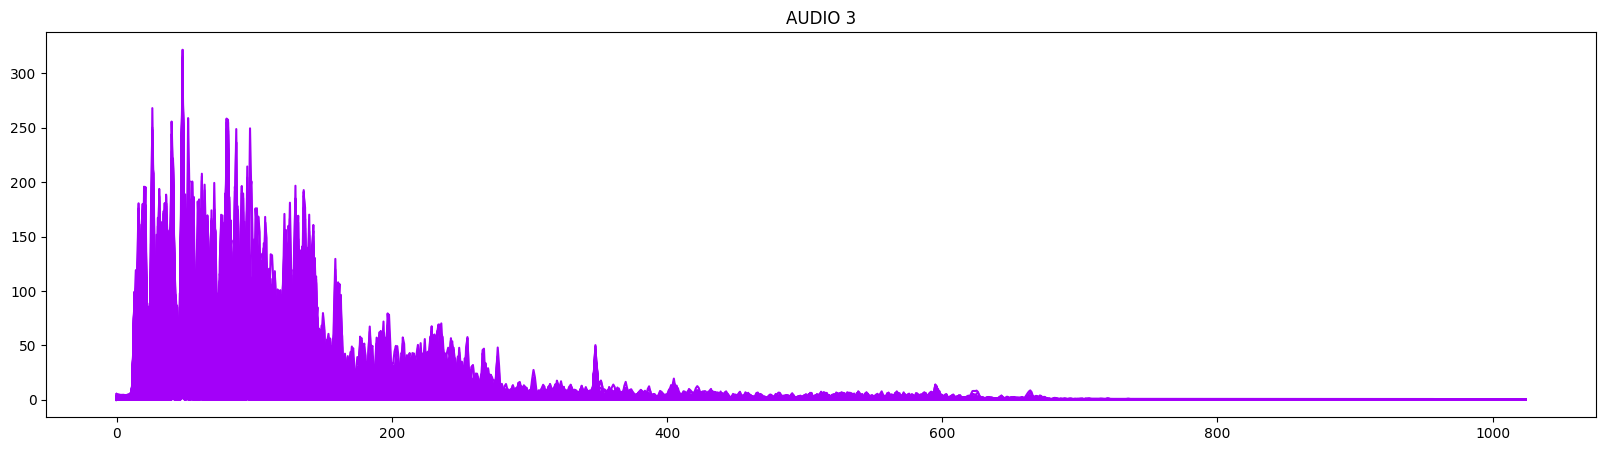

In [14]:

stft_data1 = np.abs(librosa.stft(y = data1, n_fft = 2048,hop_length = 512))
plt.figure(figsize=(20, 5))
plt.title("AUDIO 1")
plt.plot(stft_data1,color = "#A300F9")

stft_data2 = np.abs(librosa.stft(y = data2, n_fft = 2048,hop_length = 512))
plt.figure(figsize=(20, 5))
plt.title("AUDIO 2")
plt.plot(stft_data2,color = "#A300F9")

stft_data3 = np.abs(librosa.stft(y = data3, n_fft = 2048,hop_length = 512))
plt.figure(figsize=(20, 5))
plt.title("AUDIO 3")
plt.plot(stft_data3,color = "#A300F9")

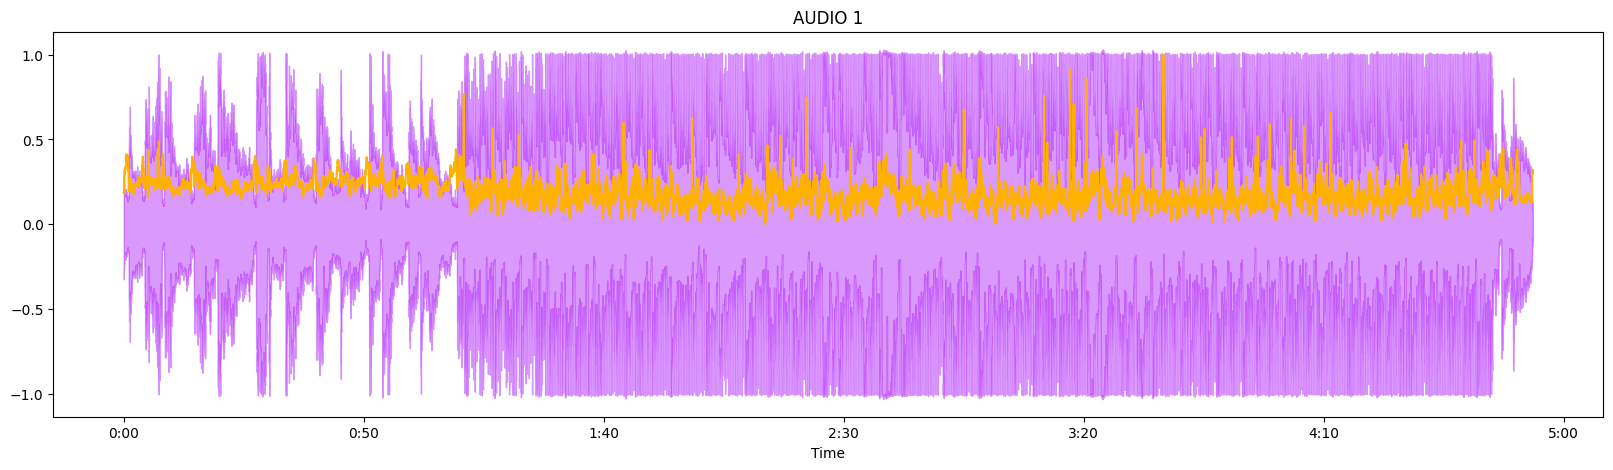

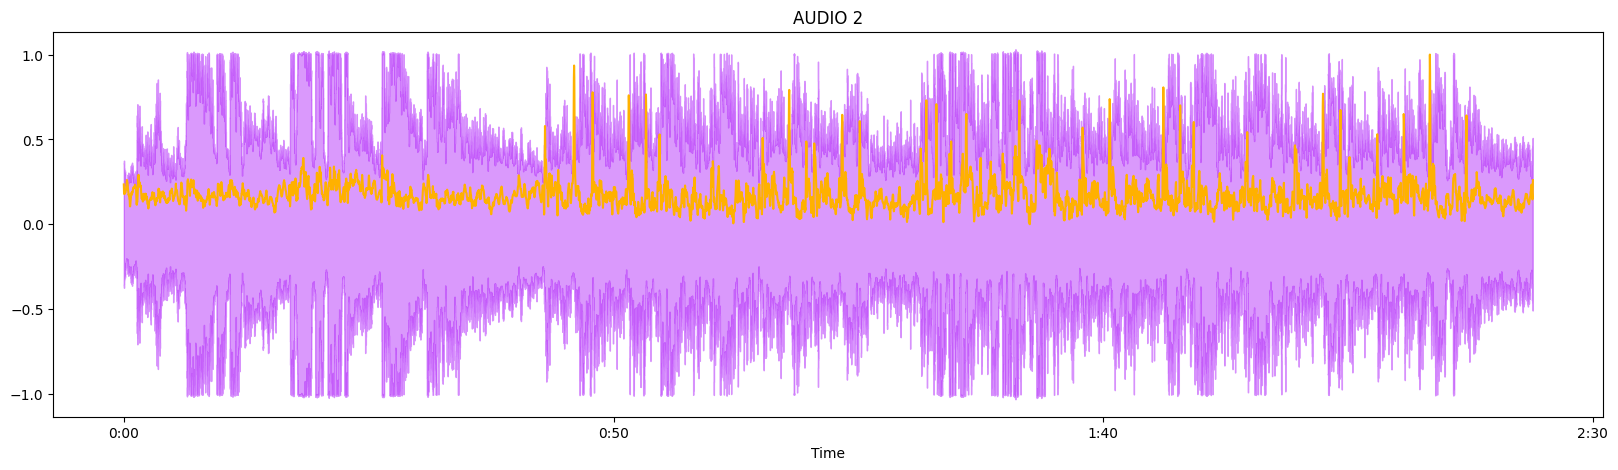

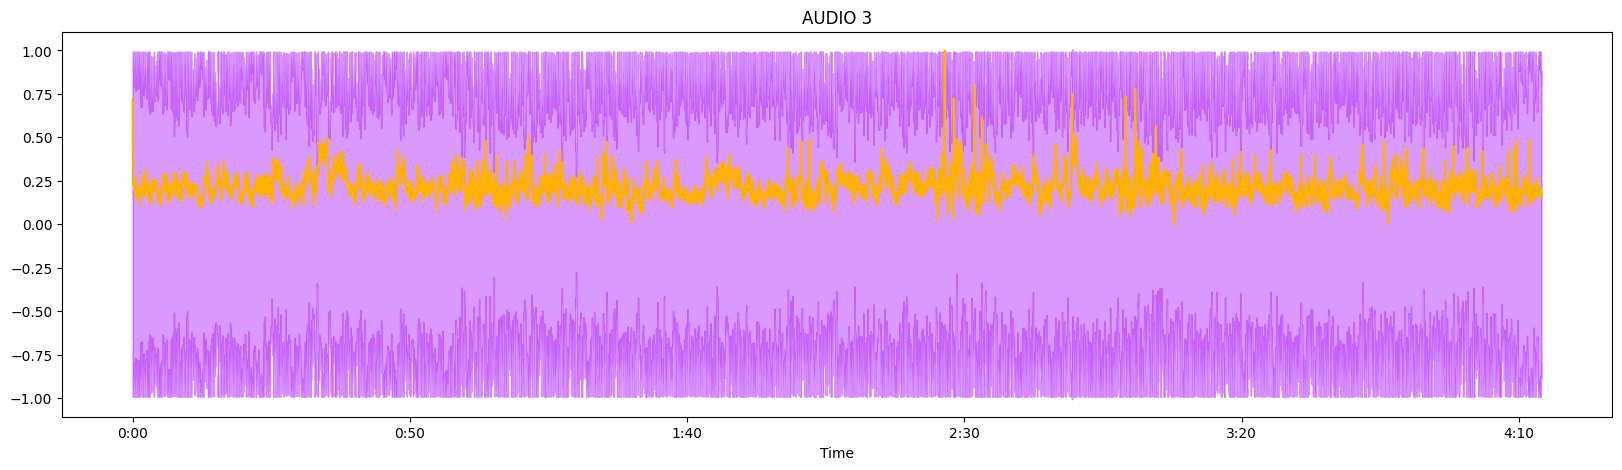

In [15]:
import sklearn

spectral_centroids1 = librosa.feature.spectral_centroid(y=data1, sr=sr1)[0]
frames = range(len(spectral_centroids1))
t = librosa.frames_to_time(frames)
plt.figure(figsize=(20, 5))
plt.title("AUDIO 1")
librosa.display.waveshow(data1, sr=sr1, alpha=0.4, color = '#A300F9')
plt.plot(t, sklearn.preprocessing.minmax_scale(spectral_centroids1, axis=0), color='#FFB100')

spectral_centroids2 = librosa.feature.spectral_centroid(y=data2, sr=sr2)[0]
frames = range(len(spectral_centroids2))
t = librosa.frames_to_time(frames)
plt.figure(figsize=(20, 5))
plt.title("AUDIO 2")
librosa.display.waveshow(data2, sr=sr2, alpha=0.4, color = '#A300F9')
plt.plot(t, sklearn.preprocessing.minmax_scale(spectral_centroids2, axis=0), color='#FFB100')

spectral_centroids3 = librosa.feature.spectral_centroid(y=data3, sr=sr3)[0]
frames = range(len(spectral_centroids3))
t = librosa.frames_to_time(frames)
plt.figure(figsize=(20, 5))
plt.title("AUDIO 3")
librosa.display.waveshow(data3, sr=sr3, alpha=0.4, color = '#A300F9')
plt.plot(t, sklearn.preprocessing.minmax_scale(spectral_centroids3, axis=0), color='#FFB100')

<Figure size 2000x500 with 0 Axes>

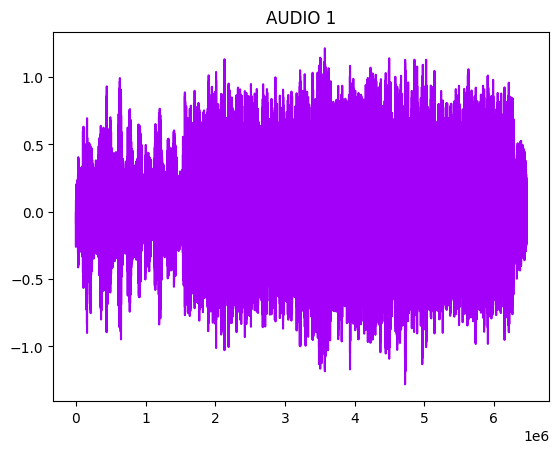

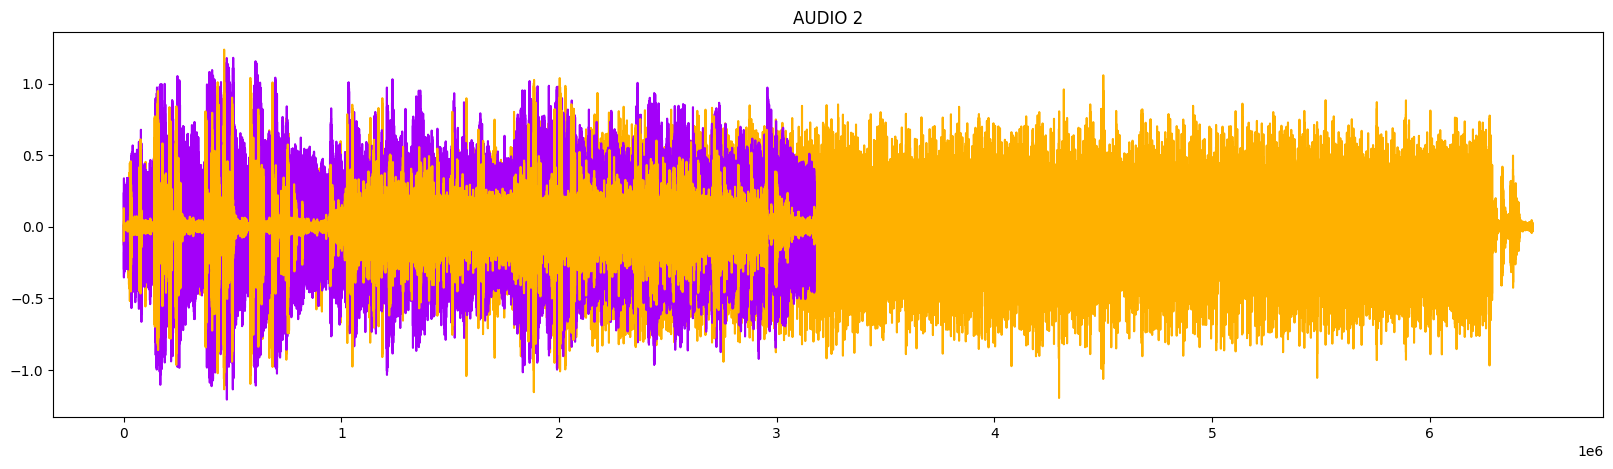

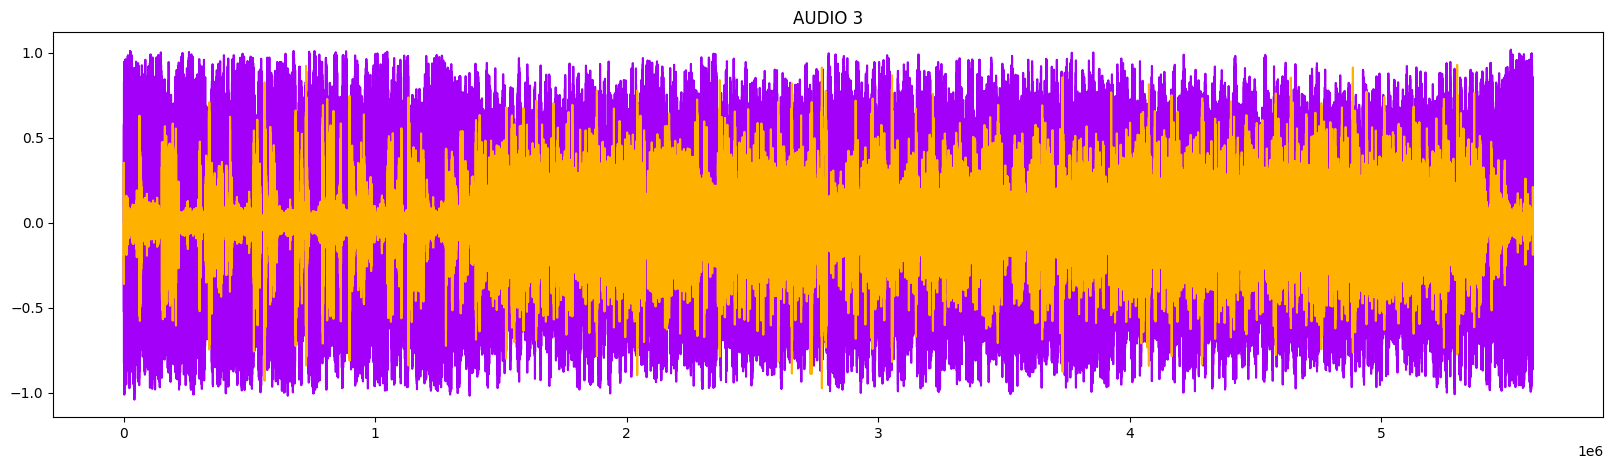

<Figure size 2000x500 with 0 Axes>

In [34]:
y_harm, y_perc = librosa.effects.hpss(data1)
plt.plot(y_harm, color = '#A300F9')
plt.title("AUDIO 1")
plt.figure(figsize=(20, 5))
plt.plot(y_perc, color = '#FFB100')


y_harm, y_perc = librosa.effects.hpss(data2)
plt.plot(y_harm, color = '#A300F9')
plt.title("AUDIO 2")
plt.plot(y_perc, color = '#FFB100')
plt.figure(figsize=(20, 5))

y_harm, y_perc = librosa.effects.hpss(data3)
plt.plot(y_harm, color = '#A300F9')
plt.title("AUDIO 3")
plt.plot(y_perc, color = '#FFB100')
plt.figure(figsize=(20, 5))

In [17]:
folder_path = '/content/music'

# Get all file names in the folder
file_names = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

# Remove the last 6 characters from each file name
Instrument_names = [name[:-6] for name in file_names]

# Print the modified file names
print(Instrument_names)

['DKanada', 'bageshree', 'DKanada', 'sarang', 'yaman', 'malkauns', 'yaman', 'sarang', 'bhairavi', 'Bhairavi', 'asavari', 'asavari', 'yaman', 'sarang', 'bhoop', 'asavari', 'bhoopali', 'Bhairavi', 'darbari', 'bhairavi', 'malkauns', 'bageshree', 'bhoop', 'malkauns', 'malkauns', 'malkauns', 'bageshree', 'sarang', 'DKanada', 'bhoop', 'yaman', 'Bhairavi', 'asavari', 'bhairavi', 'asavari', 'yaman', 'malkauns', 'bageshree', 'darbari', 'malkauns', 'sarang', 'asavari', 'malkauns', 'yaman', 'bhoop', 'bageshree', 'bhoopali', 'bageshree', 'bageshree', 'bageshree', 'bhoopali', 'bhoopali', 'sarang', 'darbari', 'darbari', 'sarang', 'yaman', 'sarang', 'bageshree', 'asavari', 'bageshree', 'yaman', 'asavari', 'bhoopali', 'bhairavi', 'asavari', 'DKanada', 'Bhairavi', 'bageshree', 'yaman', 'bhairavi', 'darbari', 'Bhairavi', 'malkauns', 'malkauns', 'yaman', 'sarang', 'bhoop', 'bageshree', 'DKanada', 'asavari', 'sarang']


In [18]:
def mfccs_features_extractor(file):
  audio, sample_rate = librosa.load(file)
  mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate,n_mfcc= 40);
  mfccs_scaled_features = np.mean(mfccs.T, axis=0)

  return mfccs_scaled_features

In [19]:
# List to store extracted features
extracted_features = []

# Loop through each file
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)

    # Extract features and append to the list
    features = mfccs_features_extractor(file_path)
    file_name = file_name.title()
    extracted_features.append([file_name[:-6],features])

In [20]:
import pandas as pd
features_df=pd.DataFrame(extracted_features,columns=['class','features'])
features_df.head()

class                                           features
0    Dkanada  [-103.38984, 151.75317, -55.035812, 5.058327, ...
1  Bageshree  [-164.01997, 107.0937, -68.94583, 12.792235, -...
2    Dkanada  [-110.84287, 153.92088, -55.985218, 5.156354, ...
3     Sarang  [-224.45493, 171.0072, -32.517273, -19.878483,...
4      Yaman  [-279.9673, 52.106136, -10.332816, 48.092426, ...

In [21]:
X=np.array(features_df['features'].tolist())
y=np.array(features_df['class'].tolist())
le=LabelEncoder()
ti=le.fit_transform(y)
y=to_categorical(ti)

In [22]:
originallabels=le.classes_
print("Original labels: ", originallabels)
print("Encoded labels: ", np.unique(ti))

Original labels:  ['Asavari' 'Bageshree' 'Bhairavi' 'Bhoop' 'Bhoopali' 'Darbari' 'Dkanada'
 'Malkauns' 'Sarang' 'Yaman']
Encoded labels:  [0 1 2 3 4 5 6 7 8 9]


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=127)

In [24]:
X_train_flat = np.array([x.flatten() for x in X_train])
X_test_flat = np.array([x.flatten() for x in X_train])

In [25]:
from tensorflow.keras import layers,models
model = models.Sequential()
model.add(layers.Conv1D(32, kernel_size=5, activation='relu', input_shape=(X_train_flat.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(layers.Conv1D(64, kernel_size=5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 36, 32)            192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 36, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 32, 64)            10304     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 32, 64)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [27]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

In [28]:
from keras.callbacks import ModelCheckpoint
from datetime import datetime
num_epochs = 50
num_batch_size = 4
checkpointer = ModelCheckpoint(filepath='saved_model.hdf5',verbose=1,save_best_only=True)
start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test),  verbose=1,callbacks=[checkpointer])
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/50
17/17 [==============================] - ETA: 0s - loss: 3.7646 - accuracy: 0.1538
Epoch 1: val_loss improved from inf to 1.85293, saving model to saved_model.hdf5
17/17 [==============================] - 6s 35ms/step - loss: 3.7646 - accuracy: 0.1538 - val_loss: 1.8529 - val_accuracy: 0.3529
Epoch 2/50
15/17 [=========================>....] - ETA: 0s - loss: 2.1718 - accuracy: 0.2333    
Epoch 2: val_loss improved from 1.85293 to 1.40127, saving model to saved_model.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 2.1267 - accuracy: 0.2462 - val_loss: 1.4013 - val_accuracy: 0.5294
Epoch 3/50
 1/17 [>.............................] - ETA: 0s - loss: 1.3183 - accuracy: 0.5000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/17 [=========================>....] - ETA: 0s - loss: 1.3742 - accuracy: 0.4833
Epoch 3: val_loss improved from 1.40127 to 1.09140, saving model to saved_model.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 1.3595 - accuracy: 0.4923 - val_loss: 1.0914 - val_accuracy: 0.5882
Epoch 4/50
13/17 [=====================>........] - ETA: 0s - loss: 0.9110 - accuracy: 0.7308
Epoch 4: val_loss improved from 1.09140 to 0.84692, saving model to saved_model.hdf5
17/17 [==============================] - 0s 9ms/step - loss: 0.9978 - accuracy: 0.7231 - val_loss: 0.8469 - val_accuracy: 0.5882
Epoch 5/50
15/17 [=========================>....] - ETA: 0s - loss: 0.7920 - accuracy: 0.7833
Epoch 5: val_loss improved from 0.84692 to 0.52651, saving model to saved_model.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 0.7556 - accuracy: 0.7846 - val_loss: 0.5265 - val_accuracy: 0.9412
Epoch 6/50
15/17 [=========================>....] - ETA: 0s - loss: 0.4797 - accuracy: 

In [29]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f"test set accuracy: {test_accuracy[1] * 100}%")

train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(f"train set accuracy: {train_accuracy[1] * 100}%")

test set accuracy: 94.11764740943909%
train set accuracy: 100.0%
